# Predicción de efermedades cardiacas con Regresión Logística

Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
Dividir el dataset en Train y Test para evaluar correctamente el modelo
Entrenar el modelo configurando los diferentes hiperparámetros
Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
Interpretar, analizar y documentar los resultados obtenidos


# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [27]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# lectura de datos en Python y lo cargamos en la variable Datos

archivo = pd.read_csv(r'C:\Users\eduar\Downloads\heart_cleveland.csv')




In [32]:
# Realizamos lectura de los Datos para el análisis exploratorio

archivo.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [34]:
# Descripción de los datos
archivo.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

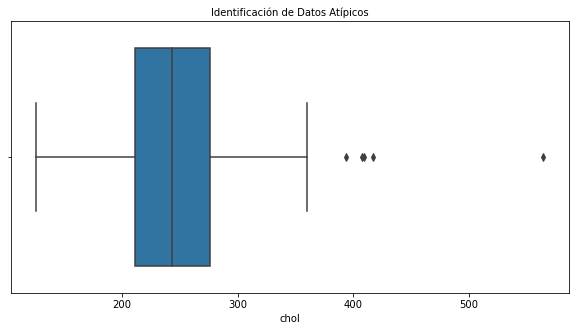

In [44]:
#Identificación de Datos Atípicos

plt.figure(figsize=(10, 5))
sns.boxplot(x=archivo['chol'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [38]:
#Revisión del tipo de datos y datos faltantes

archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario


In [49]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=400
Total_Atipicos=((archivo['chol']<nivel_minimo)|(archivo['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 4


In [50]:
# Filtra Datos Atípicos

archivo=archivo[(archivo['chol']<nivel_maximo)&(archivo['chol']>nivel_minimo)]

In [51]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((archivo['chol']<nivel_minimo)|(archivo['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [52]:
#Revisión del tipo de datos y datos faltantes

archivo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        293 non-null    int64  
 1   sex        293 non-null    int64  
 2   cp         293 non-null    int64  
 3   trestbps   293 non-null    int64  
 4   chol       293 non-null    int64  
 5   fbs        293 non-null    int64  
 6   restecg    293 non-null    int64  
 7   thalach    293 non-null    int64  
 8   exang      293 non-null    int64  
 9   oldpeak    293 non-null    float64
 10  slope      293 non-null    int64  
 11  ca         293 non-null    int64  
 12  thal       293 non-null    int64  
 13  condition  293 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.3 KB


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [53]:
# Total de personas con la enfermedad cardiaca

archivo['condition'].value_counts()

0    158
1    135
Name: condition, dtype: int64

In [54]:
archivo[['condition']].head(20)


,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [56]:

# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = archivo.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = archivo['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [57]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
24    71    0   1       160   302    0        0      162      0      0.4   
131   48    1   2       124   255    1        0      175      0      0.0   
243   55    0   3       128   205    0        1      130      1      2.0   
292   40    1   3       152   223    0        0      181      0      0.0   
185   62    0   3       140   268    0        2      160      0      3.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
172   65    1   3       120   177    0        0      140      0      0.4   
32    58    0   1       136   319    1        2      152      0      0.0   
190   62    0   3       150   244    0        0      154      1      1.4   
281   44    1   3       110   197    0        2      177      0      0.0   
233   57    1   3       132   207    0        0      168      1      0.0   

     slope  ca  thal  
24       0   2     0  
131      0   2     0  
243      1   1    

In [58]:

print (Y_train)

24     0
131    0
243    1
292    1
185    1
      ..
172    0
32     1
190    1
281    1
233    0
Name: condition, Length: 219, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros


In [59]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [60]:
print (Y_test)


113    0
274    1
136    1
186    1
285    0
      ..
150    0
267    1
139    0
133    1
162    1
Name: condition, Length: 74, dtype: int64


In [61]:
print (Prediccion)


[0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc


In [62]:

# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.97      0.82      0.89        34

    accuracy                           0.91        74
   macro avg       0.92      0.90      0.90        74
weighted avg       0.91      0.91      0.90        74



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo


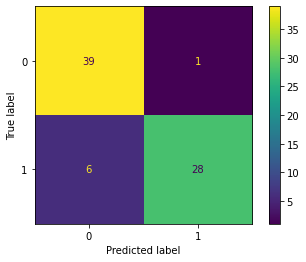

In [63]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

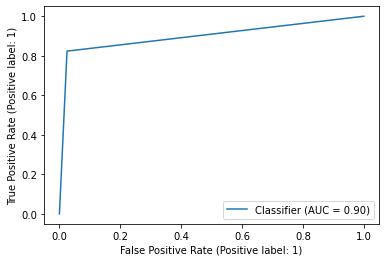

In [64]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos